## MLP Classifier

In [1]:
import pandas as pd
from scipy.io import arff

data = arff.loadarff('breast.w.arff')
df = pd.DataFrame(data[0])
df.dropna(inplace=True)
df.replace(b'benign', 0, inplace=True)
df.replace(b'malignant', 1, inplace=True)

data = df.drop(["Class"],axis=1).values
target = df["Class"].values

In [2]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

fold = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
conf_matrix1 = np.matrix([[0,0],[0,0]])
conf_matrix2 = np.matrix([[0,0],[0,0]])
for train_filter, test_filter in fold.split(data):
    data_train, data_test, target_train, target_test = data[train_filter], data[test_filter], target[train_filter], target[test_filter]
    mlp1 = MLPClassifier(hidden_layer_sizes=[3,2],alpha=10,shuffle=True,random_state=0).fit(data_train, target_train)
    mlp2 = MLPClassifier(hidden_layer_sizes=[3,2],alpha=10,shuffle=True,random_state=0,early_stopping=True).fit(data_train, target_train)
    conf_matrix1 = conf_matrix1 + confusion_matrix(target_test, mlp1.predict(data_test))
    conf_matrix2 = conf_matrix2 + confusion_matrix(target_test, mlp2.predict(data_test))
print(conf_matrix1)
print(conf_matrix2)

/home/guilherme/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/guilherme/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/guilherme/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/guilherme/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[426  18]
 [ 11 228]]
[[384  60]
 [  1 238]]


/home/guilherme/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## MLP Regressor

In [3]:
import pandas as pd
from scipy.io import arff

data = arff.loadarff('kin8nm.arff')
df = pd.DataFrame(data[0])
df.dropna(inplace=True)

data = df.drop(["y"],axis=1).values
target = df["y"].values

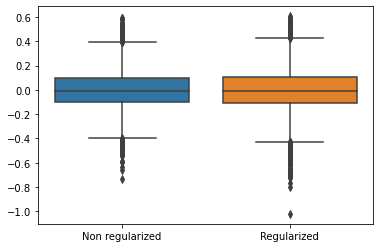

In [4]:
import numpy as np
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn import model_selection
import seaborn as sns

fold = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
residuals1, residuals2 = [], []
for train_filter, test_filter in fold.split(data):
    data_train, data_test, target_train, target_test = data[train_filter], data[test_filter], target[train_filter], target[test_filter]
    mlp1 = MLPRegressor(hidden_layer_sizes=[3,2],alpha=0,shuffle=True,random_state=0).fit(data_train, target_train)
    mlp2 = MLPRegressor(hidden_layer_sizes=[3,2],alpha=0.1,shuffle=True,random_state=0).fit(data_train, target_train)
    residuals1 += list(mlp1.predict(data_test) - target_test)
    residuals2 += list(mlp2.predict(data_test) - target_test)
df = pd.DataFrame(data={"Non regularized": residuals1, "Regularized": residuals2})
ax = sns.boxplot(data=df)